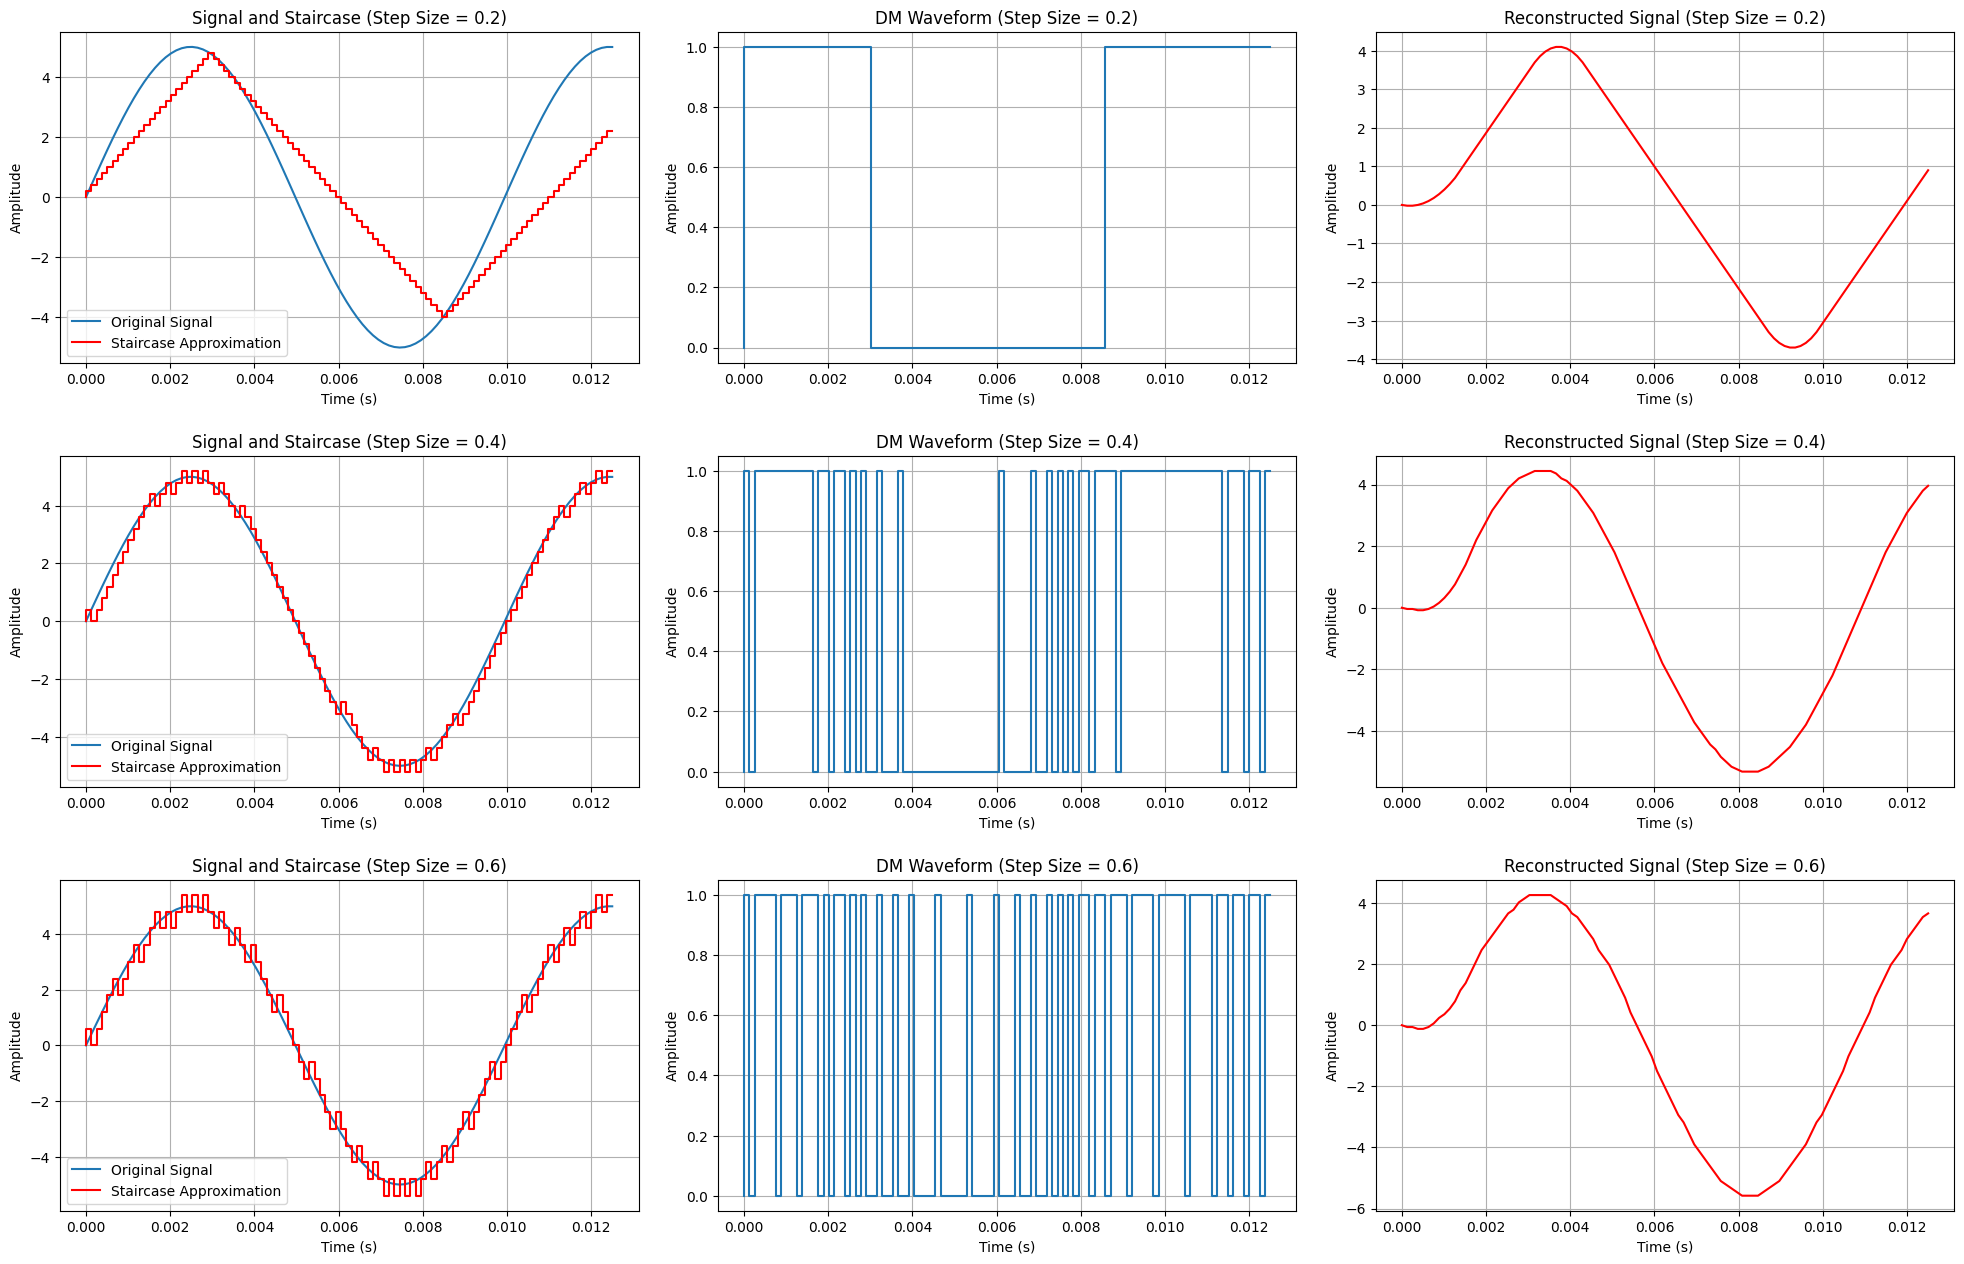

In [2]:
# Generation of Delta Modulation and its demodulation
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

def delta_modulation(x, step_size):
    y = [0]
    xr = np.zeros_like(x)
    
    for i in range(len(x) - 1):
        if xr[i] <= x[i]:
            d = 1
            xr[i + 1] = xr[i] + step_size
        else:
            d = 0
            xr[i + 1] = xr[i] - step_size
        y.append(d)
    
    return y, xr

def decode_accumulate(y, step_size):
    accumulator = [0]
    for i in range(len(y)):
        if y[i] == 1:
            accumulator.append(accumulator[-1] + step_size)
        else:
            accumulator.append(accumulator[-1] - step_size)
    return accumulator

sample_time = 0.0125
num_samples = 100
t = np.linspace(0, 2*np.pi, num_samples)
x = 5 * np.sin(2 * np.pi * t / 5)

step_sizes = [0.2, 0.4, 0.6]

plt.figure(figsize=(20, 13))

for i, step_size in enumerate(step_sizes):
    dm_waveform, staircase_signal = delta_modulation(x, step_size)
    accumulator = decode_accumulate(dm_waveform, step_size)
    b = np.ones(10)/10
    reconstructed_signal = lfilter(b, 1, accumulator)
    t_plot = np.linspace(0, sample_time, num_samples)
    
    plt.subplot(3, 3, i*3 + 1)
    plt.plot(t_plot, x, label='Original Signal')
    plt.step(t_plot, staircase_signal, 'r', label='Staircase Approximation')
    plt.title(f'Signal and Staircase (Step Size = {step_size})')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 3, i*3 + 2)
    plt.step(t_plot, dm_waveform)
    plt.title(f'DM Waveform (Step Size = {step_size})')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    plt.subplot(3, 3, i*3 + 3)
    plt.plot(t_plot, reconstructed_signal[:-1], 'r')
    plt.title(f'Reconstructed Signal (Step Size = {step_size})')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

plt.tight_layout(pad=2.0)

plt.show()
